# Introduction

This notebook is made to introduce you into computer vision world!
Today we will learn how to:
 - import image to python
 - capture camera
 - OpenCV basics

### First things first, let's see if your environment works
Run code cell below

In [2]:
import cv2
import matplotlib.pyplot as plt

print(cv2.version.opencv_version)

4.4.0.46


In [1]:
!python3 -c "import numpy; import cv2; import tensorflow; import matplotlib; import torch; print('ok')"

2020-11-07 15:14:37.423464: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
ok


Looks good :D


### Getting image

Most of time we will need data to work on, so we have to get it somehow.
In order to get image into python we can use **OpenCV** module.


In [23]:
IMAGE_PATH = "./images/spiral.jpg"
img = cv2.imread(IMAGE_PATH)

Let's print our beautiful image!

In [4]:
print(img)

[[[ 49 244   4]
  [ 35 226   0]
  [ 42 221   0]
  ...
  [ 75 232 248]
  [ 62 233 247]
  [ 54 234 246]]

 [[ 34 221   0]
  [ 48 231   3]
  [ 37 212   0]
  ...
  [ 71 232 247]
  [ 58 233 246]
  [ 51 233 245]]

 [[ 52 220   0]
  [ 47 214   0]
  [ 54 216   4]
  ...
  [ 62 232 244]
  [ 52 232 243]
  [ 47 233 243]]

 ...

 [[248  67  22]
  [239  60  15]
  [250  70  28]
  ...
  [ 20   3 244]
  [ 18   1 242]
  [ 16   0 240]]

 [[253  63  14]
  [242  54   6]
  [242  53   8]
  ...
  [ 19   0 239]
  [ 18   0 238]
  [ 17   0 237]]

 [[251  58   8]
  [250  56   8]
  [245  53   6]
  ...
  [ 16   0 236]
  [ 16   0 236]
  [ 16   0 236]]]


Oh wait, what the *!?&
Why our image turned into numbers??

Well, every image is just an array of numbers (pixels) from **[0 .. 255]**
First dimension stands for **height**

In [5]:
img_height = img.shape[0]
img_height

720

Second one for **width**


In [6]:
img_width = img.shape[1]
img_width

880

The third one is pixel
**REMEMBER** in OpenCV order of colors is BGR


In [7]:
some_pixel = img[0, 10]
some_pixel

array([ 0, 76,  0], dtype=uint8)

Now we can actually see our image :)
we do this via **matplotlib** module

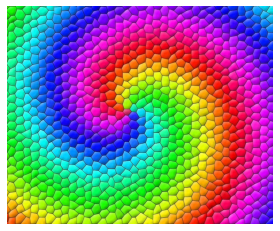

In [8]:
plt.imshow(img)
plt.axis('off')
plt.show()

### Now let's try to capture our camera

Run *capture_camera.py*

### 1. Exercise

Today we have two exercises and this is the first one!
You have to complete the function below so that it returns the image
with only one color!


In [27]:
import numpy as np

def get_one_color(image : list,
                  color : int) -> list:
    """
    :param image: input image
    :param color: color as integer:
                  BLUE = 0
                  GREEN = 1
                  RED = 2
    :return: image with only one color
    """
    return image[:, :, color]

#     raise NotImplementedError("Implement get_one_color function!")

Check your implementation

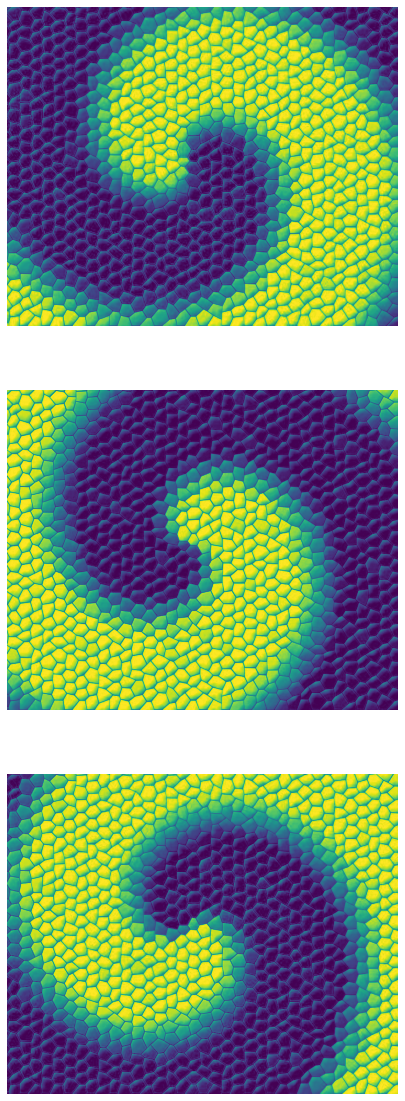

In [28]:
BLUE = 0
GREEN = 1
RED = 2

plt.figure(figsize=(20, 20))
plt.subplot(311)
one_color_img = get_one_color(img.copy(), color=BLUE)
plt.imshow(one_color_img)
plt.axis('off')
plt.subplot(312)
one_color_img = get_one_color(img.copy(), color=GREEN)
plt.imshow(one_color_img)
plt.axis('off')
plt.subplot(313)
one_color_img = get_one_color(img.copy(), color=RED)
plt.imshow(one_color_img)
plt.axis('off')
plt.show()

### 2. Exercise

Now you have to complete function, that converts BGR image to grayscale.

*Hint:*
You may need this equation for new pixel

$ Greyscale = R + G + B / 3$

In [30]:
def color_to_gray(image : list) -> list:
    """
    :param image: Input image
    :return Image converted to grayscale
    """
#     result = np.zeros(shape=image.shape[:2])
    image[:, :, 0] = image[:, :, 0] / 3
    result = np.sum(image, axis=2)
    return result

#     raise NotImplementedError("Implement color_to_gray function!")

Check your function

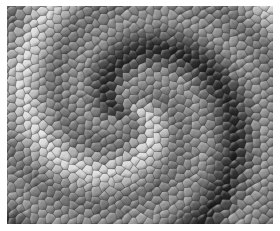

In [31]:
grayscale_image = color_to_gray(img)

plt.imshow(grayscale_image, cmap="gray")
plt.axis('off')
plt.show()

Yaaaaaaaaaay! You did it!

### Grayscale in OpenCV
Your *color_to_gray* function is cute but unfortunately we will be using
OpenCV to convert image colors by *cv2.cvtColor* method.


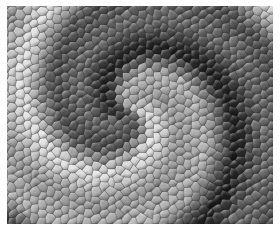

In [33]:
IMAGE_PATH = "./images/spiral.jpg"
img = cv2.imread(IMAGE_PATH)
grayscale_cv2_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(grayscale_cv2_image, cmap="gray")
plt.axis("off")
plt.show()

# Kernels 

How does kernel work? 

### $ \
g(x, y) = \omega * f(x,y) = \sum_{dx=-a}^{a} \sum_{dy=-b}^b \omega(dx, dy)f(x + dx, y + dy)\\
where: \\
f \to image \\
g \to filtered \ image \\
\omega \to kernel \\
\omega_{{a}\times{b}} = \begin{bmatrix} \omega_{1,1} & ... & \omega_{1,b} \\ . & . & . \\ \omega_{a,1} & . & \omega_{a,b} \end{bmatrix}\
$  


![SegmentLocal](images/kernel.gif "segment") 

### 3. Exercise
Implement *apply_kernel* function below 

In [ ]:
import numpy as np

def apply_kernel(img, kernel):
    """
    :param image: input image
    :param kernel: kernel as numpy array 
    :return: filtered image
    """

    raise NotImplementedError("Implement apply_kernel function!")
    

In [34]:
kernel = np.array([[0, 1, 0],
                   [0, 1, 0],
                   [0, 1, 0]])

filtered_img = apply_kernel(img=grayscale_cv2_image,
                           kernel=kernel)
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')
plt.show()

NameError: name 'apply_kernel' is not defined

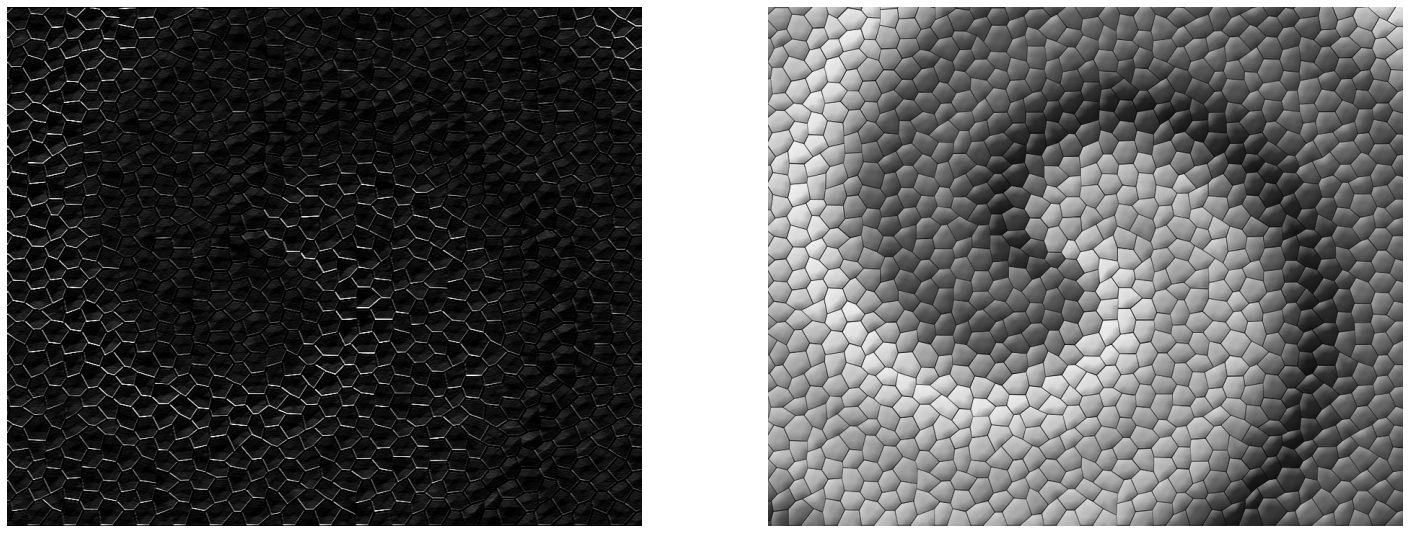

In [73]:
IMAGE_PATH = "./images/spiral.jpg"
img = cv2.imread(IMAGE_PATH)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

kernel = kernel.T

# kernel = kernel / 9.0

filtered_img = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(25, 25))
plt.subplot(121)
plt.imshow(filtered_img, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()